In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pylab as pl
import matplotlib.patches as mpatches
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)

In [2]:
df=pd.read_csv("movies.csv")

In [3]:
df.shape

(200, 8)

In [4]:
x=np.arange(0.0,5.0,0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

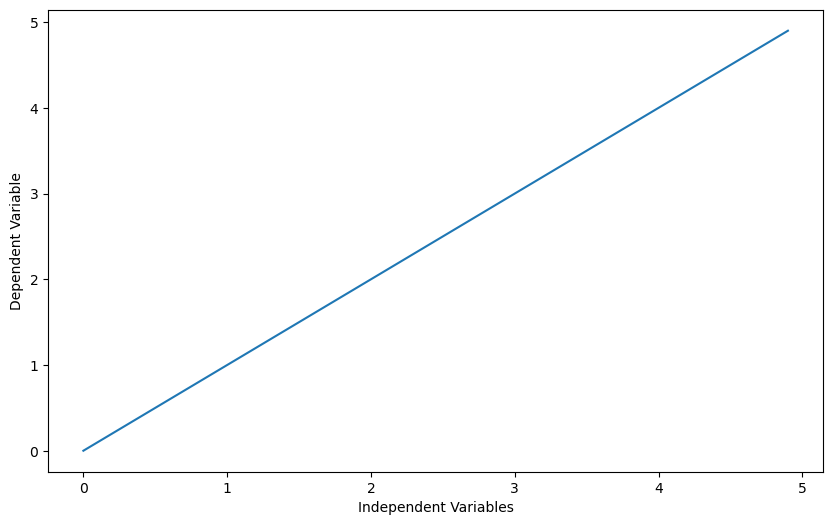

In [5]:
a=1
b=0
y = a * x + b

plt.plot(x,y)
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variables")
plt.show()

# Linear Regression with Tensorflow

In [6]:
df.head()

,Unnamed: 0,title,overview,release_date,popularity,vote_count,vote_average,original_language
0,0,Puss in Boots: The Last Wish,Puss in Boots discovers that his passion for a...,2022-12-07,5032.178,3032,8.6,en
1,1,M3GAN,A brilliant toy company roboticist uses artifi...,2022-12-28,3734.476,1110,7.5,en
2,2,JUNG_E,"On an uninhabitable 22nd-century Earth, the ou...",2023-01-20,2435.432,185,6.2,ko
3,3,Avatar: The Way of Water,Set more than a decade after the events of the...,2022-12-14,2099.293,4894,7.7,en
4,4,Black Panther: Wakanda Forever,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",2022-11-09,1993.631,1893,7.5,en


In [7]:
x_train = np.asanyarray(df[['vote_count']])
y_train = np.asanyarray(df[['popularity']])

In [8]:
p = tf.Variable(20.0)
q = tf.Variable(30.2)

def h(x):
    y = p * x + q
    return y

In [9]:
def loss_object(y,y_train) :
    return tf.reduce_mean(tf.square(y - y_train))

In [10]:
alpha = 0.01
train_data = []
loss_values = []
a_value = []
b_value = []
epochs = 200

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = h(x_train)
        loss_value = loss_object(y_train,y_pred)
        loss_values.append(loss_value)

        gradients = tape.gradient(loss_values, [q,p])
        
        a_value.append(p.numpy())
        b_value.append(q.numpy())
        q.assign_sub(gradients[0]*alpha)
        p.assign_sub(gradients[1]*alpha)
        if epoch % 5 == 0:
            train_data.append([p.numpy(), q.numpy()])

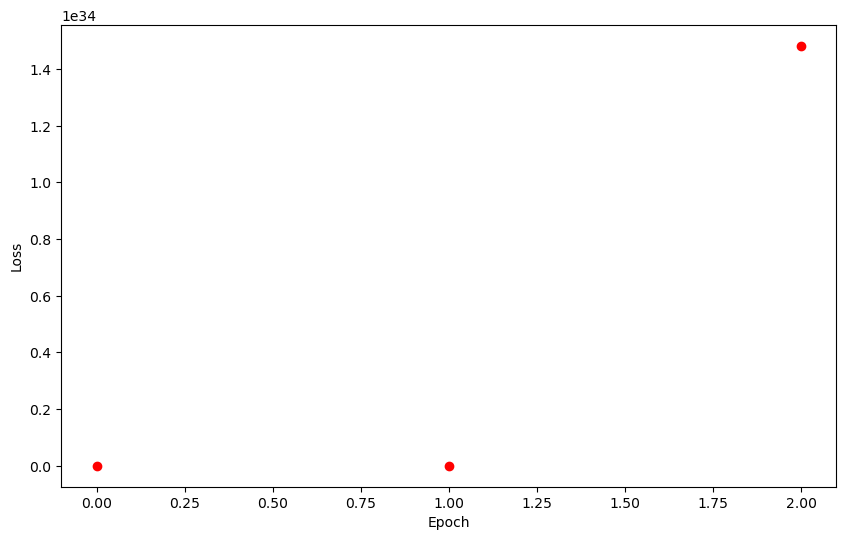

In [11]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

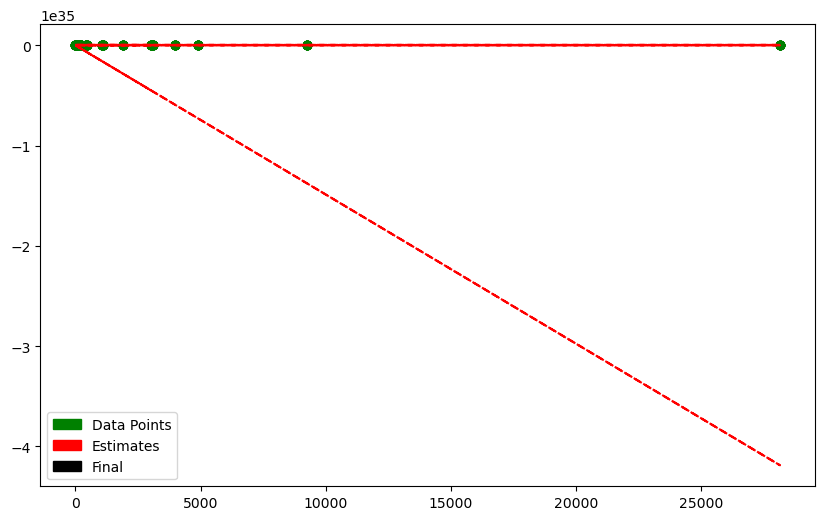

In [12]:
plt.scatter(x_train, y_train, color='green')
for p,q in zip(a_value[0:len(a_value)], b_value[0:len(b_value)]):
    plt.plot(x_train,p*x_train+q, color='red', linestyle='dashed')
plt.plot(x_train,a_value[-1]*x_train+b_value[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()

# Linear-Regression using Tensorflow without

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
np.random.seed(101)
tf.compat.v1.set_random_seed(101)

In [15]:
x = np.linspace(0,50,50)
y = np.linspace(0,50,50)

x +=np.random.normal(-4,4,50)
y +=np.random.normal(-4,4,50)

n = len(x)

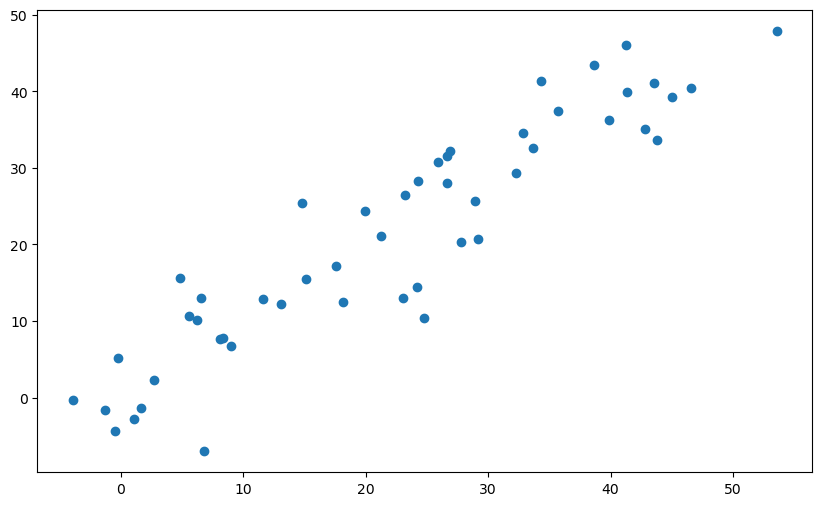

In [16]:
plt.scatter(x,y)

In [17]:
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder('float')
Y = tf.compat.v1.placeholder('float')

In [18]:
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name= 'b')

In [19]:
l = 0.01
e = 1000

In [20]:
y_pred = tf.add(tf.multiply(X,W),b)
cost = tf.reduce_sum(tf.pow(y_pred-Y,2))/(2*n)
optimizer = tf.compat.v1.train.GradientDescentOptimizer(l).minimize(cost)
init = tf.compat.v1.global_variables_initializer()

In [21]:
with tf.compat.v1.Session() as sess:
     
    # Initializing the Variables
    sess.run(init)
     
    # Iterating through all the epochs
    for epoch in range(e):
         
        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x, y):
            sess.run(optimizer, feed_dict = {X : _x, Y : _y})
         
        # Displaying the result after every 50 epochs
        if (epoch + 1) % 50 == 0:
            # Calculating the cost a every epoch
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
     
    # Storing necessary values to be used outside the Session
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 16.666279 W = 0.93175435 b = -0.72630095
Epoch 100 : cost = 16.375914 W = 0.9238928 b = -0.35977283
Epoch 150 : cost = 16.166126 W = 0.91709256 b = -0.042725142
Epoch 200 : cost = 16.015627 W = 0.91121036 b = 0.23152082
Epoch 250 : cost = 15.908608 W = 0.90612227 b = 0.46874368
Epoch 300 : cost = 15.833372 W = 0.90172106 b = 0.6739412
Epoch 350 : cost = 15.781264 W = 0.897914 b = 0.85143745
Epoch 400 : cost = 15.745897 W = 0.89462084 b = 1.0049723
Epoch 450 : cost = 15.722562 W = 0.8917724 b = 1.1377782
Epoch 500 : cost = 15.707811 W = 0.8893084 b = 1.2526556
Epoch 550 : cost = 15.699119 W = 0.88717705 b = 1.3520261
Epoch 600 : cost = 15.694638 W = 0.88533354 b = 1.4379792
Epoch 650 : cost = 15.693041 W = 0.88373876 b = 1.5123311
Epoch 700 : cost = 15.69336 W = 0.8823593 b = 1.5766431
Epoch 750 : cost = 15.694912 W = 0.8811661 b = 1.6322746
Epoch 800 : cost = 15.697206 W = 0.880134 b = 1.6803962
Epoch 850 : cost = 15.699905 W = 0.87924117 b = 1.7220213
Epoch 900 : cos

In [22]:
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 15.708445 Weight = 0.877223 bias = 1.8161132 



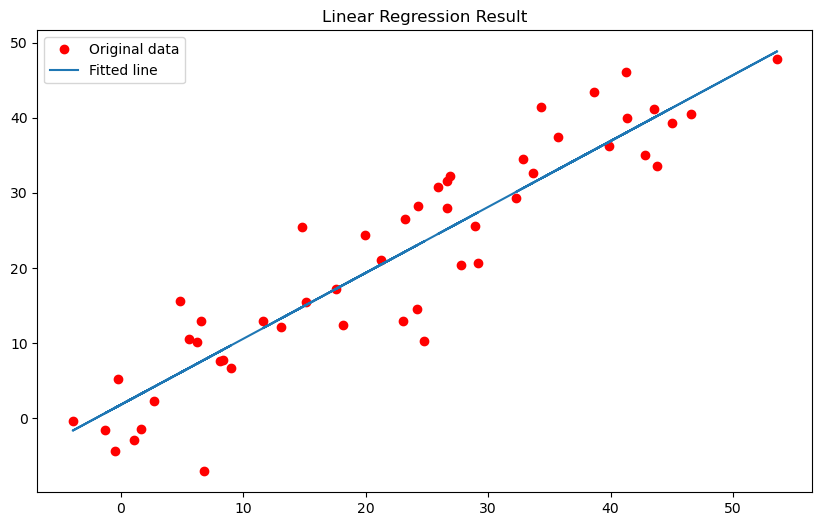

In [23]:
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()